# Initialization

## Import libraries

In [1]:
import os
import eyelinkio
import pandas as pd
import sys

## Import `visualeyes`

In [2]:
# get the current working directory (location of the notebook)
notebook_dir = os.getcwd()

# path to the visualeyes package
visualeyes_path = os.path.abspath(os.path.join(notebook_dir, "..")) # Go up one directory

# add the path to sys.path
if visualeyes_path not in sys.path:
    sys.path.append(visualeyes_path)

# import visualeyes
import visualeyes

ModuleNotFoundError: No module named 'visualeyes.define_aoi'

## Fetch Example Data

In [7]:
# define the path to the edf file
current_path = os.getcwd()
data_dir = os.path.abspath(os.path.join(current_path, "..", "data"))
edf_path = os.path.join(data_dir, 'TG_2015.EDF')

# Analysis

## Convert edf file to pandas dataframes

In [8]:
# read the edf file
edf = eyelinkio.read_edf(edf_path)

# convert the edf file to a dicitionary of pandas dataframes
edf_dfs = edf.to_pandas()

loadEvents = 1
setTrial End:  END
loadEvents = 1


## Demo 1: visualize data quality of the first 300ms into a trial

In [9]:
# add time column to the dataframes
edf_dfs = visualeyes.add_time_to_sample(edf, edf_dfs)

# get trial data
trial_data = edf_dfs['discrete']['trials']

NameError: name 'visualeyes' is not defined

In [ ]:
# epoch the first 300ms of every trial
trial_start = trial_data['stime'].values
duration = 300/1000 # 300ms = 0.3s

# get the data, here we are interested in all samples collected
all_data = edf_dfs['samples']

# epoch the data
epochs, epoched_data = visualeyes.epoch_data(all_data, trial_start, duration)
epoched_data

,xpos,ypos,ps,time,epoch_index
0,599.200012,452.500000,510.0,0.000,0
1,599.500000,454.200012,511.0,0.002,0
2,600.000000,455.899994,511.0,0.004,0
3,600.400024,457.299988,512.0,0.006,0
4,600.700012,459.100006,513.0,0.008,0
...,...,...,...,...,...
664939,773.099976,545.200012,147.0,1329.878,89
664940,773.000000,545.700012,147.0,1329.880,89
664941,773.000000,546.200012,148.0,1329.882,89
664942,773.099976,546.799988,148.0,1329.884,89


## Demo 2: Visualize gaze data with a heatmap and areas of interest

loadEvents = 1
setTrial End:  END
loadEvents = 1


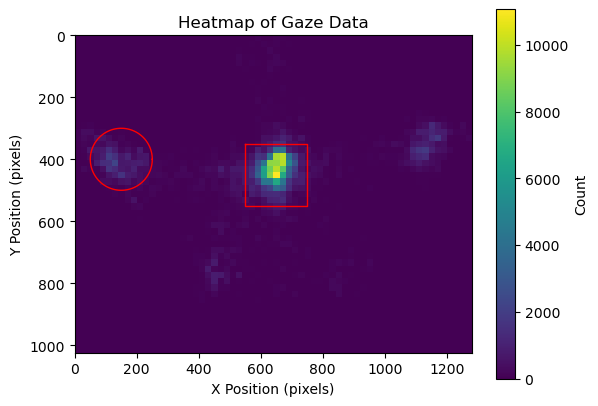

In [16]:
# get the current working directory (location of the notebook)
notebook_dir = os.getcwd()

# path to the visualeyes package
visualeyes_path = os.path.abspath(os.path.join(notebook_dir, "..")) # Go up one directory

# add the path to sys.path
if visualeyes_path not in sys.path:
    sys.path.append(visualeyes_path)

# import visualeyes
import visualeyes


#File paths
current_path = os.getcwd()
data_dir = os.path.abspath(os.path.join(current_path, "..", "data"))
edf_path = os.path.join(data_dir, 'TG_2015.EDF')

#read edf and convert to pandas df
edf = eyelinkio.read_edf(edf_path)
edf_dfs = edf.to_pandas()

#get screen coords
screen_coordinates = edf['info']['screen_coords']
screen_width, screen_height = screen_coordinates

# Define AOI's
aoi_definitions = [{'shape': 'rectangle', 'coordinates': (550, 750, 350, 550)},
                   {"shape": "circle", "coordinates": [150, 400, 100]}]

#dataframe with gaze data (just x and y positions)
data = edf_dfs['samples'][['xpos', 'ypos']]

#Plot the heatmap
visualeyes.plot_heatmap(data, screen_coordinates, aoi_definitions)